<h2>Prediccion de titanic </h2>

Analisis exploratorio de los datos 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Importamos las librerias necesarias para la visualizacion de datos

In [29]:
titanic_df= pd.read_csv('train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
# Se observa que el dataset tiene 12 columnas y 891 filas, donde cada fila representa un pasajero
#Columna nombre no es tan importante por lo que pidemos empezar a eliminarla
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Correlaciones entre variables numericas')

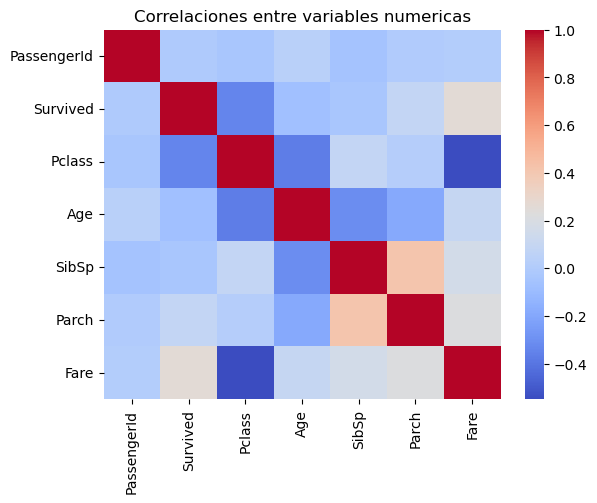

In [31]:
numeric_df = titanic_df.select_dtypes(include=['number']) # seleccionamos los valores numericos
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title('Correlaciones entre variables numericas')

StratifiedShuffleSplit en scikit-learn es un método de validación cruzada (cross-validation) que:

Características principales:
Mantiene la proporción de clases: Conserva el mismo porcentaje de muestras de cada clase tanto en el conjunto de entrenamiento como en el de prueba (útil para datasets desbalanceados).

División aleatoria: Mezcla los datos y los divide en partes aleatorias (sin orden fijo, a diferencia de StratifiedKFold).

Múltiples divisiones: Permite generar varias divisiones (train/test) independientes con solo un objeto

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
#dividimos el dataset en train y test, para ello utilizamos StratifiedShuffleSplit
# StratifiedShuffleSplit es una técnica de muestreo estratificado que asegura
#  que la proporción de clases en el conjunto de entrenamiento y prueba sea similar a la del conjunto original.
stratify_columns = titanic_df[['Survived', 'Pclass', 'Sex']]
split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic_df, stratify_columns):
    strat_train_set = titanic_df.loc[train_index]
    strat_test_set = titanic_df.loc[test_index]

In [ ]:
strat_test_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
335,336,0,3,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


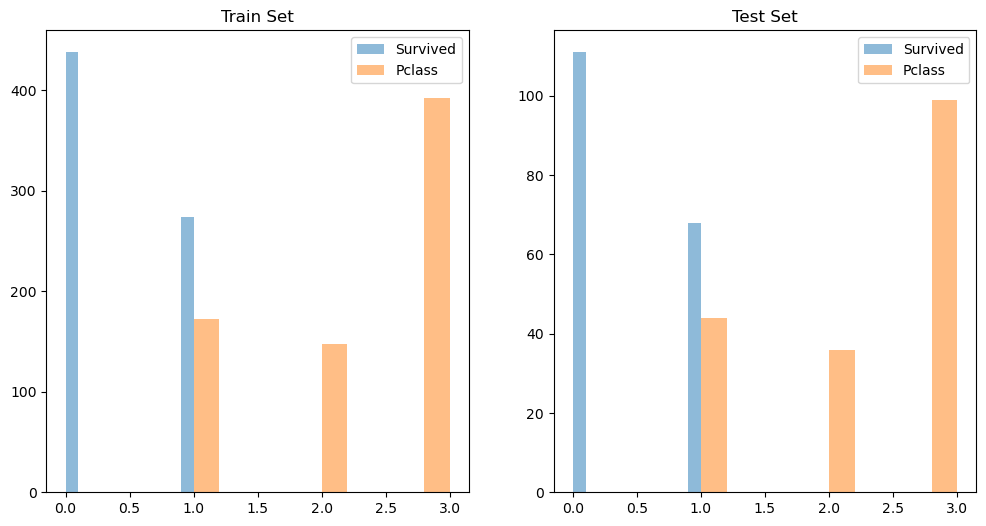

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Se grafican las variables Survived y Pclass para los conjuntos de entrenamiento y prueba vemos que tienen una proporcion similar
# Plot for strat_train_set
axes[0].hist(strat_train_set['Survived'], alpha=0.5, label='Survived')
axes[0].hist(strat_train_set['Pclass'], alpha=0.5, label='Pclass')
axes[0].set_title('Train Set')
axes[0].legend()

# Plot for strat_test_set
axes[1].hist(strat_test_set['Survived'], alpha=0.5, label='Survived')
axes[1].hist(strat_test_set['Pclass'], alpha=0.5, label='Pclass')
axes[1].set_title('Test Set')
axes[1].legend()

plt.show()


In [37]:
#LLenar los valores faltantes con valores neutrales, por ejemplo, la edad de los pasajeros
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin    

from sklearn.impute import SimpleImputer

In [ ]:
# Rralizar una columna de edad, donde se agrupan los pasajeros en 4 grupos y dividir el sexo en 0 y 1
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    #el metodo fir=t se utiliza para ajustar el transformador a los datos de entrada
    # y el metodo transform se utiliza para transformar los valores a columnas numericas

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
            
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X

In [40]:
# eliminar columnas que no son necesarias para el modelo
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [41]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [46]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
280,281,0,3,65.000000,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
694,695,0,1,60.000000,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
12,13,0,3,20.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
101,102,0,3,30.050789,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
257,258,1,1,30.000000,0,0,86.5000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
722,723,0,2,34.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
697,698,1,3,30.050789,0,0,7.7333,0.0,1.0,0.0,1.0,0.0
787,788,0,3,8.000000,4,1,29.1250,0.0,1.0,0.0,0.0,1.0
363,364,0,3,35.000000,0,0,7.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
strat_train_set = pipeline.fit_transform(strat_train_set)
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
280,281,0,3,65.000000,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
694,695,0,1,60.000000,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
12,13,0,3,20.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
101,102,0,3,30.050789,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
257,258,1,1,30.000000,0,0,86.5000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
722,723,0,2,34.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
697,698,1,3,30.050789,0,0,7.7333,0.0,1.0,0.0,1.0,0.0
787,788,0,3,8.000000,4,1,29.1250,0.0,1.0,0.0,0.0,1.0
363,364,0,3,35.000000,0,0,7.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
strat_train_set.info() # ya no tiene valores nulos o faltantes

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 280 to 428
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
# Separamos los datos en X e y, donde X son las variables independientes y y es la variable dependiente
X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']
# estandarizar los datos para que tengan media 0 y desviacion estandar 1
scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#definimos el modelo a utilizar, en este caso RandomForestClassifier
clf = RandomForestClassifier()
# param grid es un diccionario que contiene los hiperparametros a ajustar
param_grid = [
    {"n_estimators": [10, 100, 200, 500], 
     "max_depth": [None, 5 ,10], 
     "min_samples_split": [2, 3, 4]}
]
# GridSearchCV es una técnica de búsqueda de hiperparámetros que utiliza validación cruzada para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
#Los mejores hiperparametros son los que maximizan la puntuacion de accuracy
prod_final_clf = grid_search.best_estimator_

In [51]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200)

In [54]:
titanic_test_data = pd.read_csv("test.csv") # cargamos el dataset de test

In [55]:
final_test_data = pipeline.fit_transform(titanic_test_data)

X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


C:\Users\joel_\AppData\Local\Temp\ipykernel_20140\1540499233.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method="ffill")


In [56]:
predictions = prod_final_clf.predict(X_data_final_test)

In [57]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions.csv", index=False)
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
